<a href="https://colab.research.google.com/github/Duku-code/Duku/blob/main/Clustering_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
data = pd.read_csv("movie_metadata1.csv")
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723,178,0,855,Joel David Moore,1000,760505847,Action|Adventure|Fantasy|Sci-Fi,...,3054,English,USA,PG-13,237000000,2009,936,7.9,1.78,33000
1,Color,Gore Verbinski,302,169,563,1000,Orlando Bloom,40000,309404152,Action|Adventure|Fantasy,...,1238,English,USA,PG-13,300000000,2007,5000,7.1,2.35,0
2,Color,Sam Mendes,602,148,0,161,Rory Kinnear,11000,200074175,Action|Adventure|Thriller,...,994,English,UK,PG-13,245000000,2015,393,6.8,2.35,85000
3,Color,Christopher Nolan,813,164,22000,23000,Christian Bale,27000,448130642,Action|Thriller,...,2701,English,USA,PG-13,250000000,2012,23000,8.5,2.35,164000
4,49,Doug Walker,49,49,131,49,Rob Walker,131,49,Documentary,...,49,49,49,49,49,49,12,7.1,49.00,0


In [3]:
data.tail()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
5038,Color,Scott Smith,1,87,2,318,Daphne Zuniga,637,49,Comedy|Drama,...,6,English,Canada,49,49,2013,470,7.7,49.00,84
5039,Color,49,43,43,49,319,Valorie Curry,841,49,Crime|Drama|Mystery|Thriller,...,359,English,USA,TV-14,49,49,593,7.5,16.00,32000
5040,Color,Benjamin Roberds,13,76,0,0,Maxwell Moody,0,49,Drama|Horror|Thriller,...,3,English,USA,49,1400,2013,0,6.3,49.00,16
5041,Color,Daniel Hsia,14,100,0,489,Daniel Henney,946,10443,Comedy|Drama|Romance,...,9,English,USA,PG-13,49,2012,719,6.3,2.35,660
5042,Color,Jon Gunn,43,90,16,16,Brian Herzlinger,86,85222,Documentary,...,84,English,USA,PG,1100,2004,23,6.6,1.85,456


In [4]:
data.duplicated().sum()

45

In [5]:
data.drop_duplicates(inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      4998 non-null   object 
 1   director_name              4998 non-null   object 
 2   num_critic_for_reviews     4998 non-null   int64  
 3   duration                   4998 non-null   int64  
 4   director_facebook_likes    4998 non-null   int64  
 5   actor_3_facebook_likes     4998 non-null   int64  
 6   actor_2_name               4998 non-null   object 
 7   actor_1_facebook_likes     4998 non-null   int64  
 8   gross                      4998 non-null   int64  
 9   genres                     4998 non-null   object 
 10  actor_1_name               4998 non-null   object 
 11  movie_title                4998 non-null   object 
 12  num_voted_users            4998 non-null   int64  
 13  cast_total_facebook_likes  4998 non-null   int64

In [8]:
df = data.select_dtypes(include ='object')
df

,color,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,movie_imdb_link,language,country,content_rating
0,Color,James Cameron,Joel David Moore,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,Wes Studi,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,English,USA,PG-13
1,Color,Gore Verbinski,Orlando Bloom,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,Jack Davenport,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,English,USA,PG-13
2,Color,Sam Mendes,Rory Kinnear,Action|Adventure|Thriller,Christoph Waltz,Spectre,Stephanie Sigman,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,English,UK,PG-13
3,Color,Christopher Nolan,Christian Bale,Action|Thriller,Tom Hardy,The Dark Knight Rises,Joseph Gordon-Levitt,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,English,USA,PG-13
4,49,Doug Walker,Rob Walker,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,49,49,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,49,49,49
...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,Daphne Zuniga,Comedy|Drama,Eric Mabius,Signed Sealed Delivered,Crystal Lowe,fraud|postal worker|prison|theft|trial,http://www.imdb.com/title/tt3000844/?ref_=fn_t...,English,Canada,49
5039,Color,49,Valorie Curry,Crime|Drama|Mystery|Thriller,Natalie Zea,The Following,Sam Underwood,cult|fbi|hideout|prison escape|serial killer,http://www.imdb.com/title/tt2071645/?ref_=fn_t...,English,USA,TV-14
5040,Color,Benjamin Roberds,Maxwell Moody,Drama|Horror|Thriller,Eva Boehnke,A Plague So Pleasant,David Chandler,49,http://www.imdb.com/title/tt2107644/?ref_=fn_t...,English,USA,49
5041,Color,Daniel Hsia,Daniel Henney,Comedy|Drama|Romance,Alan Ruck,Shanghai Calling,Eliza Coupe,49,http://www.imdb.com/title/tt2070597/?ref_=fn_t...,English,USA,PG-13


In [9]:
df.columns

Index(['color', 'director_name', 'actor_2_name', 'genres', 'actor_1_name',
       'movie_title', 'actor_3_name', 'plot_keywords', 'movie_imdb_link',
       'language', 'country', 'content_rating'],
      dtype='object')

In [10]:
data_new = data.drop(columns=['color', 'director_name', 'actor_2_name', 'genres', 'actor_1_name',
       'movie_title', 'actor_3_name', 'plot_keywords', 'movie_imdb_link',
       'language', 'country', 'content_rating'])
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data_new), columns=data_new.columns)
data_scaled.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,4.818501,2.792804,-0.241800,0.132829,-0.368590,11.189729,5.813847,-0.266629,-0.473653,7.377456,1.021156,0.170845,-0.174574,1.297998,-0.300723,1.322663
1,1.344896,2.438594,-0.040269,0.221253,2.222515,4.185164,2.808301,2.129153,-0.473653,2.563286,1.341020,0.163778,0.834841,0.586251,-0.251775,-0.388175
2,3.820149,1.612104,-0.241800,-0.290384,0.295796,2.487523,1.393452,0.111380,-0.156361,1.916449,1.061773,0.192045,-0.309444,0.319346,-0.251775,4.018528
3,5.561077,2.241810,7.633295,13.637230,1.358813,6.339266,7.683390,5.344873,-0.473653,6.441662,1.087159,0.181445,5.305675,1.831809,-0.251775,8.114170
4,-0.742568,-2.284207,-0.194907,-0.358683,-0.426325,-0.619165,-0.604480,-0.524893,-0.473653,-0.588722,-0.182144,-6.754509,-0.404077,0.586251,3.754187,-0.388175


In [11]:
import warnings
warnings.filterwarnings("ignore")

79967.99999999994
66373.1336251799
60491.78234996587
55265.63572608
50518.218041916116
47050.021051073716
43929.41942758403
40120.005893378344
37595.129848582925


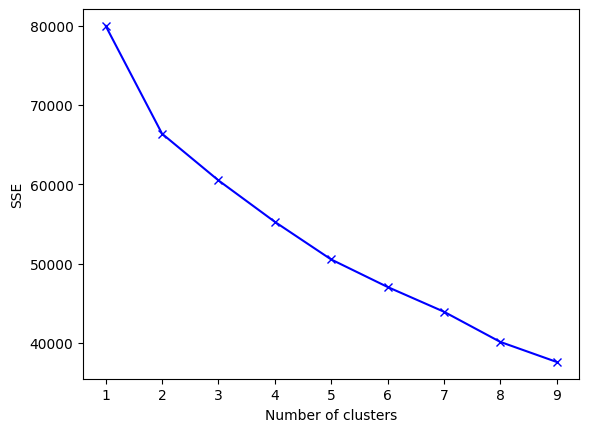

In [14]:
sse = {}

for k in range(1,10):
  kmeans = KMeans(n_clusters=k, random_state=1)
  kmeans.fit(data_scaled)
  sse[k] = kmeans.inertia_
  print(kmeans.inertia_)
plt.plot(list(sse.keys()), list(sse.values()),'bx-')
plt.xlabel('Number of clusters')
plt.ylabel("SSE")
plt.show()

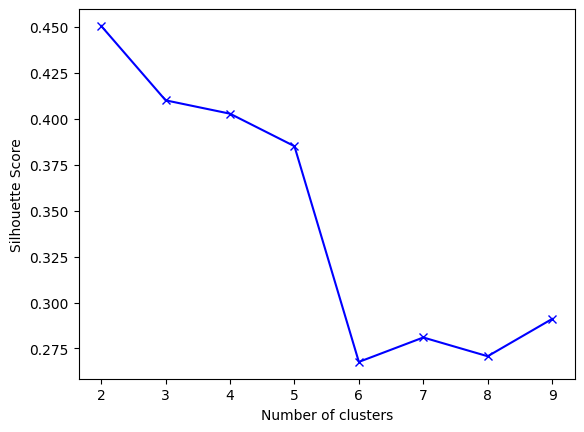

In [26]:
sc = {}

for k in range(2,10):
  kmeans = KMeans(n_clusters=k, random_state=1)
  kmeans.fit(data_scaled)
  labels = kmeans.predict(data_scaled)
  sc[k] = silhouette_score(data_scaled,labels)
plt.plot(list(sc.keys()), list(sc.values()),'bx-')
plt.xlabel('Number of clusters')
plt.ylabel("Silhouette Score")
plt.show()

In [28]:
kmeans = KMeans(n_clusters=2, random_state=1)
kmeans.fit(data_scaled)
data['cluster_label']= kmeans.predict(data_scaled)


In [29]:
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,cluster_label
0,Color,James Cameron,723,178,0,855,Joel David Moore,1000,760505847,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000,2009,936,7.9,1.78,33000,1
1,Color,Gore Verbinski,302,169,563,1000,Orlando Bloom,40000,309404152,Action|Adventure|Fantasy,...,English,USA,PG-13,300000000,2007,5000,7.1,2.35,0,1
2,Color,Sam Mendes,602,148,0,161,Rory Kinnear,11000,200074175,Action|Adventure|Thriller,...,English,UK,PG-13,245000000,2015,393,6.8,2.35,85000,1
3,Color,Christopher Nolan,813,164,22000,23000,Christian Bale,27000,448130642,Action|Thriller,...,English,USA,PG-13,250000000,2012,23000,8.5,2.35,164000,1
4,49,Doug Walker,49,49,131,49,Rob Walker,131,49,Documentary,...,49,49,49,49,49,12,7.1,49.00,0,0


In [30]:
data.groupby('cluster_label').agg(['mean', 'median', 'count'])

num_critic_for_reviews                 duration               \
                                mean median count        mean median count   
cluster_label                                                                
0                         107.368927   90.0  4261  104.053509  101.0  4261   
1                         321.869742  304.0   737  124.297151  120.0   737   

              director_facebook_likes              actor_3_facebook_likes  \
                                 mean median count                   mean   
cluster_label                                                               
0                          377.077212   44.0  4261             377.103027   
1                         2400.820896  179.0   737            2140.838535   

               ... actor_2_facebook_likes imdb_score               \
               ...                  count       mean median count   
cluster_label  ...                                                  
0              ...                   4261   6.300915    6.4  4261   
1              ...                    737   7.251289    7.3   737   

              aspect_ratio              movie_facebook_likes                 
                      mean median count                 mean   median count  
cluster_label                                                                
0                 5.795963   2.35  4261          3147.583196     62.0  4261  
1                 2.310231   2.35   737         32578.458616  22000.0   737  

[2 rows x 48 columns]